## 로이터 뉴스 데이터 분류

Vocabulary Size 변경에 따른 실험

### 모든 단어 이용해서 분류

#### 데이터 다운로드

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('done')

done


In [3]:
# num_words 을 None 으로 설정하면 모든 단어 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

#### 데이터 확인

In [4]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 준다.

In [6]:
print(y_train[0])
print(y_test[0])

3
3


In [7]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


이 뉴스 데이터는 총 46개의 클래스를 가지고 있다.  
이 정도면 적지는 않은 클래스라서 높은 정확도를 얻는 일이 쉽지는 않을 것 같은 예감이 든다.

#### 데이터 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


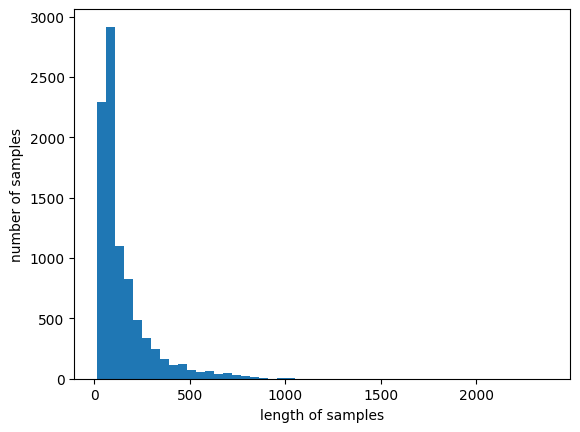

In [10]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

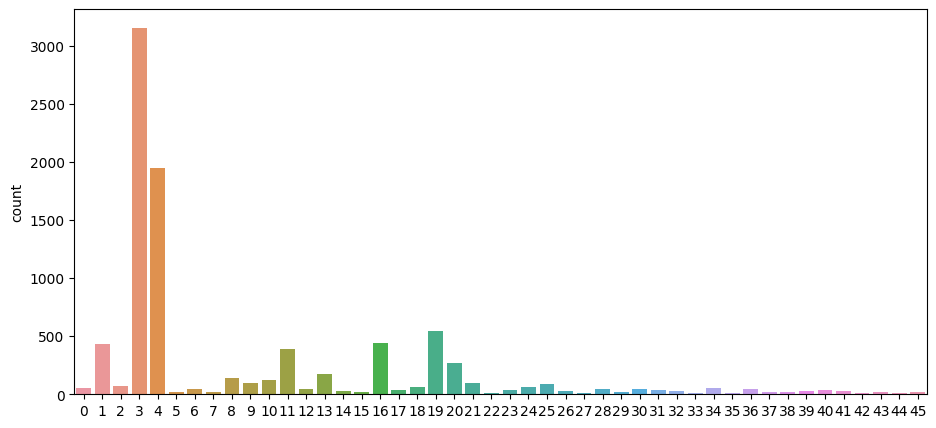

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [12]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재한다.  
그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많다.

이렇게 각 클래스가 몇 개가 존재하는지도 확인해 보았다.

#### 데이터 복원

In [9]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 얻는 숫자보다는 +3 을 한 숫자가 원래 고유한 숫자
index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [10]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [11]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


### 벡터화 하기

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


여기서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용할 것이다.

사용할 벡터화 방법은 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬이다.

#### DTM 생성

Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있다.

In [13]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


훈련용 뉴스의 수가 총 8,982개였기 때문에 DTM의 행의 개수는 8,982개가 된다.

그런데 이상한 점은 앞에서 데이터를 로드할 때, num_words=10,000이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않는다.  
그 이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문이다.

#### TF-IDF 행렬 생성

DTM 행렬을 이어서 TF-IDF 행렬을 만들어보자.

TF-IDF 행렬은 DTM의 단점을 보정해 주는 효과를 가지고 있다. https://wikidocs.net/31698 참고

TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성한다.  
TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가진다.

In [14]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


#### 테스트 데이터도 TF-IDF 로 변환

In [15]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

### 머신러닝 모델 사용하기

In [18]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import f1_score

### 나이브 베이즈 분류기

In [19]:
model = MultinomialNB()
model.fit(tfidfv, y_train)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("나이브 베이즈 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("나이브 베이즈 f1 score:", f1_score(y_test, predicted, average='weighted'))

나이브 베이즈 정확도: 0.5997328584149599
나이브 베이즈 f1 score: 0.5045670886188423


### Complement Naive Bayes Classifier(CNB)

In [20]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("CNB 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("CNB f1 score:", f1_score(y_test, predicted, average='weighted'))

CNB 정확도: 0.7649154051647373
CNB f1 score: 0.7346534179503126


### 로지스틱 회귀(Logistic Regression)

In [23]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=1000)
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("로지스틱 회귀 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("로지스틱 회귀 f1 score:", f1_score(y_test, predicted, average='weighted'))

로지스틱 회귀 정확도: 0.815227070347284
로지스틱 회귀 f1 score: 0.8098135210407686


D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [24]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=1000, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("선형 서포트 벡터 머신 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("선형 서포트 벡터 머신 f1 score:", f1_score(y_test, predicted, average='weighted'))

선형 서포트 벡터 머신 정확도: 0.7845057880676759
선형 서포트 벡터 머신 f1 score: 0.7802150180051939


D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 결정 트리(Decision Tree)

In [25]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("결정 트리 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("결정 트리 f1 score:", f1_score(y_test, predicted, average='weighted'))

결정 트리 정확도: 0.6211041852181657
결정 트리 f1 score: 0.5769283128518846


### 랜덤 포레스트(Random Forest)

In [26]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("랜덤 포레스트 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("랜덤 포레스트 f1 score:", f1_score(y_test, predicted, average='weighted'))

랜덤 포레스트 정확도: 0.6544968833481746
랜덤 포레스트 f1 score: 0.6225909375608356


--------
### 빈도수 상위 5000자를 사용해 Vocabulary 만들기

In [27]:
# num_words 을 None 으로 설정하면 모든 단어 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [28]:
# 데이터의 단어장
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 얻는 숫자보다는 +3 을 한 숫자가 원래 고유한 숫자
index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [29]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [30]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [31]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [33]:
model = MultinomialNB()
model.fit(tfidfv, y_train)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("나이브 베이즈 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("나이브 베이즈 f1 score:", f1_score(y_test, predicted, average='weighted'))

나이브 베이즈 정확도: 0.6731967943009796
나이브 베이즈 f1 score: 0.6012501291711391


In [32]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("CNB 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("CNB f1 score:", f1_score(y_test, predicted, average='weighted'))

lr = LogisticRegression(C=10000, penalty='l2', max_iter=1000)
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("로지스틱 회귀 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("로지스틱 회귀 f1 score:", f1_score(y_test, predicted, average='weighted'))

lsvc = LinearSVC(C=1000, penalty='l1', max_iter=1000, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("선형 서포트 벡터 머신 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("선형 서포트 벡터 머신 f1 score:", f1_score(y_test, predicted, average='weighted'))

tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("결정 트리 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("결정 트리 f1 score:", f1_score(y_test, predicted, average='weighted'))

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("랜덤 포레스트 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("랜덤 포레스트 f1 score:", f1_score(y_test, predicted, average='weighted'))

CNB 정확도: 0.7707034728406055
CNB f1 score: 0.7458990404916549


D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8036509349955476
로지스틱 회귀 f1 score: 0.7988443127942066


D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


선형 서포트 벡터 머신 정확도: 0.773820124666073
선형 서포트 벡터 머신 f1 score: 0.7696415992944503
결정 트리 정확도: 0.6179875333926982
결정 트리 f1 score: 0.5729970881280324
랜덤 포레스트 정확도: 0.701246660730187
랜덤 포레스트 f1 score: 0.6770217603524399


-------

#### 모든 단어를 사용할 때 
나이브 베이즈 정확도: 0.5997328584149599  
나이브 베이즈 f1 score: 0.5045670886188423  
CNB 정확도: 0.7649154051647373  
CNB f1 score: 0.7346534179503126  
로지스틱 회귀 정확도: 0.815227070347284  
로지스틱 회귀 f1 score: 0.8098135210407686  
선형 서포트 벡터 머신 정확도: 0.7845057880676759  
선형 서포트 벡터 머신 f1 score: 0.7802150180051939  
결정 트리 정확도: 0.6211041852181657  
결정 트리 f1 score: 0.5769283128518846  
랜덤 포레스트 정확도: 0.6544968833481746  
랜덤 포레스트 f1 score: 0.6225909375608356  

#### 빈도수 상위 5,000자를 사용할 때
나이브 베이즈 정확도: 0.6731967943009796  
나이브 베이즈 f1 score: 0.6012501291711391  
CNB 정확도: 0.7707034728406055  
CNB f1 score: 0.7458990404916549  
로지스틱 회귀 정확도: 0.8036509349955476  
로지스틱 회귀 f1 score: 0.7988443127942066  
선형 서포트 벡터 머신 정확도: 0.773820124666073  
선형 서포트 벡터 머신 f1 score: 0.7696415992944503  
결정 트리 정확도: 0.6179875333926982  
결정 트리 f1 score: 0.5729970881280324  
랜덤 포레스트 정확도: 0.701246660730187  
랜덤 포레스트 f1 score: 0.6770217603524399  

#### 근소하지만, 빈도수 상위 5000 자를 사용할 때의 결과가 더 좋네~

---------
### 딥러닝 모델과 비교하기

In [34]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping

In [35]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
print(len(x_train), len(x_test))

8982 2246


#### 패딩과 원-핫인코딩

훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


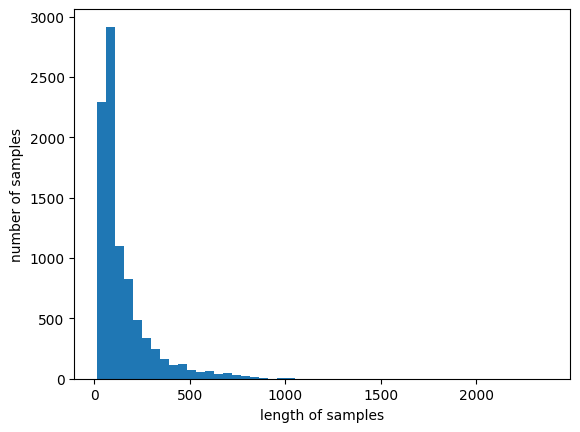

In [36]:
# 훈련용 데이터 최대 길이 및 평균 길이 살펴보기
print("훈련용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_train)))
print("훈련용 뉴스의 평균 길이: {}".format(sum(map(len, x_train))/len(x_train)))
      
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

테스트용 뉴스의 최대 길이: 1032
테스트용 뉴스의 평균 길이: 147.66117542297417


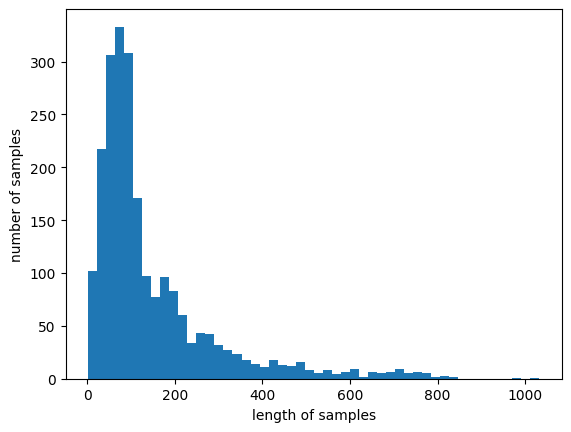

In [37]:
# 테스트 데이터 최대 길이 및 평균 길이 살펴보기
print("테스트용 뉴스의 최대 길이: {}".format(max(len(l) for l in x_test)))
print("테스트용 뉴스의 평균 길이: {}".format(sum(map(len, x_test))/len(x_test)))
      
plt.hist([len(s) for s in x_test], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

In [38]:
# keras.preprocessing.sequence.pad_sequences()를 사용하여 패딩
# padding
maxlen = 100
x_train = keras.preprocessing.sequence.pad_sequences(x_train, padding='pre', maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test, padding='pre', maxlen=maxlen)

In [39]:
# to_categorical()을 사용하여 레이블에 원-핫인코딩을 해보세요. 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### 모델 성능을 비교하는 함수 만들기

In [40]:
# http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255 참고

from tensorflow.keras import backend as K
def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) 
    y_target_yn = K.round(K.clip(y_target, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

#### LSTM 을 사용하여 성능을 확인해 봅시다.

In [41]:
# 어휘 사전 크기 
vocab_size = 10000
# 워드 벡터의 차원수 
word_vector_dim = 100

#RNN 모델 설계
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(128))   
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1,128,494
Trainable params: 1,128,494
Non-trainable params: 0
_________________________________________________________________


In [42]:
# earliy stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1score])

# fit
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es], validation_split=0.2)

Epoch 1/30
57/57 [==============================] - 10s 143ms/step - loss: 2.7253 - accuracy: 0.3442 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1score: 0.0000e+00 - val_loss: 2.4134 - val_accuracy: 0.3450 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 2/30
57/57 [==============================] - 8s 132ms/step - loss: 2.4109 - accuracy: 0.3534 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1score: 0.0000e+00 - val_loss: 2.3948 - val_accuracy: 0.3450 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 3/30
57/57 [==============================] - 7s 124ms/step - loss: 2.1475 - accuracy: 0.4416 - precision: 0.6917 - recall: 0.2146 - f1score: 0.3240 - val_loss: 2.0073 - val_accuracy: 0.4435 - val_precision: 0.7681 - val_recall: 0.3029 - val_f1score: 0.4313
Epoch 4/30
57/57 [==============================] - 7s 120ms/step - loss: 1.9035 - accuracy: 0.4967 - precision: 0.8236 - recall: 0.3829 - f1score: 0.5157 - va

In [43]:
# 성능 확인 
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print('accuracy:', accuracy)
print('f1_score:', f1_score)

accuracy: 0.6531611680984497
f1_score: 0.7901875376701355
